In [1]:
import pandas as pd
import requests

In [2]:
start_year = 1981
end_year = 2022

In [3]:
filename = f"joenju_{start_year}_{end_year}.csv"
URL = f"https://api.taegon.kr/stations/146/?sy={start_year}&ey={end_year}&format=csv"
res = requests.get(URL)
with open(filename, "w", newline="") as f:
    f.write(res.text)

In [11]:
# 파일 읽어오기
df = pd.read_csv(filename)
df.head()

,year,month,day,tmax,tavg,tmin,humid,wind,sunshine,rainfall,snow,cloud
0,1981,1,1,4.0,-1.2,-5.4,83.8,3.7,0.0,9.4,6.9,7.5
1,1981,1,2,-2.2,-4.0,-5.4,91.0,2.6,0.2,5.8,7.5,10.0
2,1981,1,3,-2.8,-6.3,-10.5,78.5,1.4,8.3,0.0,0.0,2.8
3,1981,1,4,-3.4,-8.2,-12.6,78.0,0.8,8.3,0.0,0.0,3.8
4,1981,1,5,-3.5,-7.0,-10.5,71.3,0.9,7.0,0.0,0.0,2.3


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15298 entries, 0 to 15297
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       15298 non-null  int64  
 1    month     15298 non-null  int64  
 2    day       15298 non-null  int64  
 3    tmax      15298 non-null  float64
 4    tavg      15298 non-null  float64
 5    tmin      15298 non-null  float64
 6    humid     15298 non-null  float64
 7    wind      15298 non-null  float64
 8    sunshine  15298 non-null  float64
 9    rainfall  15298 non-null  float64
 10   snow      15298 non-null  float64
 11   cloud     15298 non-null  float64
dtypes: float64(9), int64(3)
memory usage: 1.4 MB


In [14]:
df.describe()

,year,month,day,tmax,tavg,tmin,humid,wind,sunshine,rainfall,snow,cloud
count,15298.000000,15298.000000,15298.000000,15298.000000,15298.000000,15298.000000,15298.000000,15298.000000,15298.000000,15298.000000,15298.000000,15298.000000
mean,2001.444045,6.508825,15.728265,19.083266,13.567604,8.932462,69.346156,1.599614,5.775892,3.551870,0.100497,5.119016
std,12.089792,3.442647,8.800237,10.028404,9.842027,10.113078,12.386156,0.707458,3.797336,11.916723,0.778328,3.108914
min,1981.000000,1.000000,1.000000,-8.500000,-12.400000,-16.500000,26.400000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,10.400000,5.000000,0.200000,61.300000,1.100000,2.200000,0.000000,0.000000,2.500000
50%,2001.000000,7.000000,16.000000,20.700000,14.500000,9.000000,70.000000,1.500000,6.400000,0.000000,0.000000,5.100000
75%,2012.000000,9.000000,23.000000,27.800000,22.300000,18.100000,77.800000,1.900000,8.900000,0.800000,0.000000,7.800000
max,2022.000000,12.000000,31.000000,38.900000,32.100000,29.000000,99.800000,7.400000,13.700000,249.500000,18.500000,10.000000


In [13]:
# 컬럼명 확인하기 (빈칸 제거 필요)
print(df.columns)
df.columns.str.strip() #빈칸 제거해주는 함수! strip
# df.columns = [x.strip() for x in df.columns] 이건 교수님 추천 방법

Index(['year', ' month', ' day', ' tmax', ' tavg', ' tmin', ' humid', ' wind',
       ' sunshine', ' rainfall', ' snow', ' cloud'],
      dtype='object')


Index(['year', 'month', 'day', 'tmax', 'tavg', 'tmin', 'humid', 'wind',
       'sunshine', 'rainfall', 'snow', 'cloud'],
      dtype='object')

In [18]:
# 로딩할 때 빈칸 제거하는 방법
df = pd.read_csv(filename, sep='\\s*,\\s*', engine="python") #=> 우왕!
df.columns

Index(['year', 'month', 'day', 'tmax', 'tavg', 'tmin', 'humid', 'wind',
       'sunshine', 'rainfall', 'snow', 'cloud'],
      dtype='object')

In [24]:
df['year']

0        1981
1        1981
2        1981
3        1981
4        1981
         ... 
15293    2022
15294    2022
15295    2022
15296    2022
15297    2022
Name: year, Length: 15298, dtype: int64

In [53]:
# 최근 3년간 월간 강수량
df1 = df[['year','month','rainfall']].groupby(['year', 'month']).sum()
df2 = df1.tail(35)
df2 = df2.reset_index()

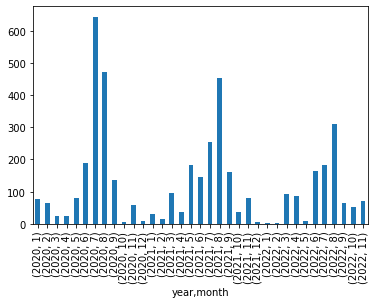

In [64]:
#교수님답
df[df['year']>=2020].groupby(['year', 'month'])['rainfall'].sum().plot.bar();

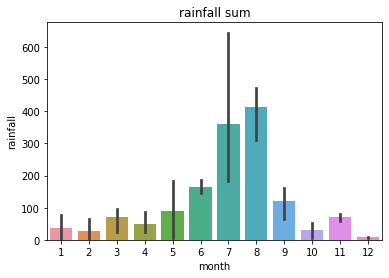

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시본으로 그리면 왜 년도랑 월을 못 합치는것일까!
sns.barplot(data = df2, x='month', y='rainfall')
plt.title("rainfall sum")
plt.show()

**예시 답안**

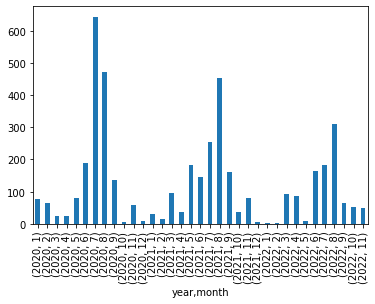

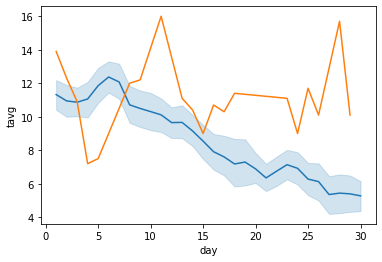

In [74]:
# 평년 대비 올해 11월의 평균온도를 그리시오.
import seaborn as sns

sns.lineplot(data = df[df['month']==11], x='day', y='tavg');
sns.lineplot(data = df[(df['month']==11)&(df['year']==2022)], x='day', y='tavg');

**예시 답안**
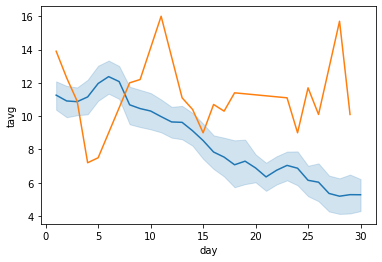

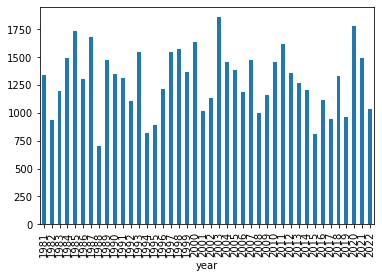

In [99]:
# 연간 총 강수량 변화를 표로 출력하고, 그래프로 그리시오.
df.groupby(['year'])['rainfall'].sum().plot.bar();

**예시 답안**

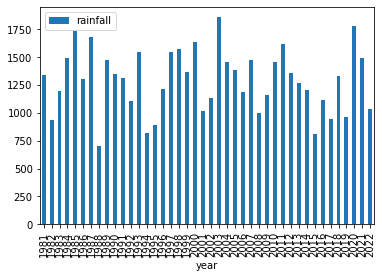

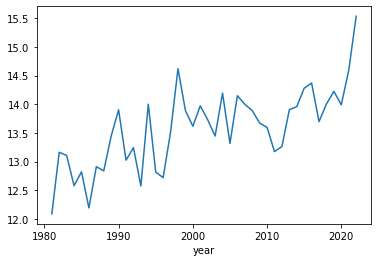

In [104]:
# 연평균 온도변화를 그리시오. (단, 2022년은 제외)
df[df['year']].groupby('year')['tavg'].mean().plot.line()

**예시 답안**
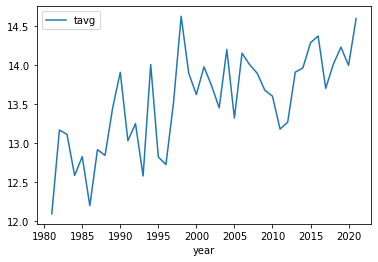

In [107]:
import seaborn as sns
#주황 : 올해 365일평균온도 파랑 : 40년동안 365일별 평균온도

df[df['year']==2022]['tavg'].mean().plot()

AttributeError: ignored

**예시 답안**

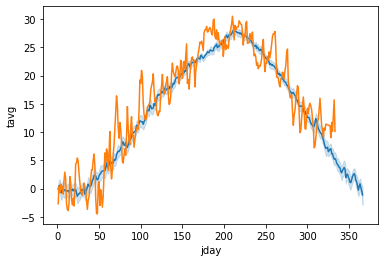